# multiple Regration

In [1]:
# it is more than one independ variable are presetn to predict y target value
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics


In [2]:
car=pd.read_csv('cars.csv')
car

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [3]:
# fist we chake null value are not 
# data cleaning process
car.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

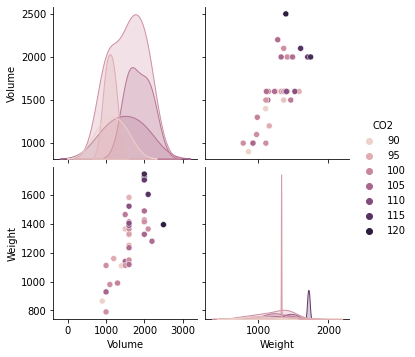

In [4]:
# data visulation 
sns.pairplot(car,hue='CO2')
plt.show()

C:\Users\Ankush Niwane\anaconda3\envs\carprediction12\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume', ylabel='CO2'>

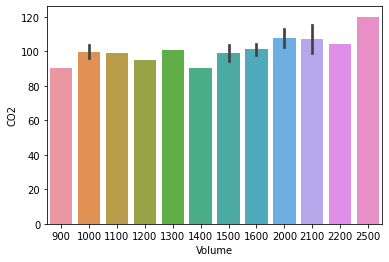

In [5]:
sns.barplot(car.Volume,car.CO2)

{'whiskers': [<matplotlib.lines.Line2D at 0xa3e98b8130>,
 'caps': [<matplotlib.lines.Line2D at 0xa3e98b8790>,
 'boxes': [<matplotlib.lines.Line2D at 0xa3e98a9ca0>],
 'medians': [<matplotlib.lines.Line2D at 0xa3e98b8eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0xa3e98c4280>],
 'means': []}

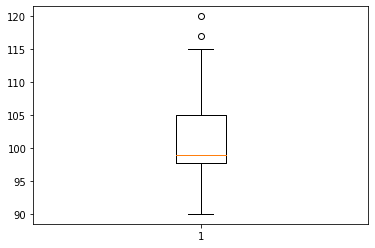

In [6]:
plt.boxplot(car['CO2'])

(array([ 3.,  4.,  3., 10.,  5.,  3.,  3.,  0.,  3.,  2.]),
 array([ 90.,  93.,  96.,  99., 102., 105., 108., 111., 114., 117., 120.]),
 <BarContainer object of 10 artists>)

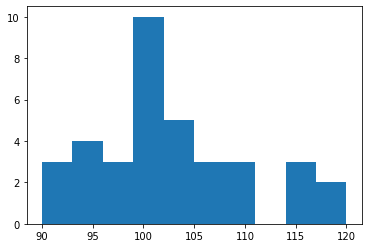

In [7]:
# we have outlinar
plt.hist(car['CO2'],bins=10)

In [8]:
count=0
for x in car.CO2:
    if x>110:
        count+=1
count        

5

In [9]:
for x in car.index:
    if car.loc[x,'CO2']>110:
        car.drop(x,inplace=True)

In [10]:
car.shape

(31, 5)

In [11]:
car.CO2.unique

<bound method Series.unique of 0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
28    109
32    104
33    108
34    109
Name: CO2, dtype: int64>

In [12]:
car.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [13]:
# so we chake all data are liner so we apply liner regration on model
x=car.loc[:,['Volume','Weight']]


y=car['CO2'].values
print(x)
y

    Volume  Weight
0     1000     790
1     1200    1160
2     1000     929
3      900     865
4     1500    1140
5     1000     929
6     1400    1109
7     1500    1365
8     1500    1112
9     1600    1150
10    1100     980
11    1300     990
12    1000    1112
13    1600    1252
14    1600    1326
15    1600    1330
16    1600    1365
17    2200    1280
18    1600    1119
19    2000    1328
20    1600    1584
21    2000    1428
22    2100    1365
23    1600    1415
24    2000    1415
25    1500    1465
26    2000    1490
28    1600    1523
32    1600    1235
33    1600    1390
34    1600    1405


array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 109, 104, 108, 109], dtype=int64)

In [14]:
len(y)

31

# LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([ 97.02726908,  98.31639507,  97.20058627,  96.70689651,
        99.53312447,  97.20058627,  99.08058196,  99.81367387,
        99.49821166,  99.95948238,  97.67806651,  98.51831345,
        97.42876645, 100.08666477, 100.17893435, 100.1839219 ,
       100.22756291, 102.60491184,  99.9208289 , 101.83698429,
       100.500631  , 101.96167292, 102.29700813, 100.28990723,
       101.94546339,  99.93836249, 102.03897986, 100.42457094,
       100.06546771, 100.25873507, 100.27743836])

In [16]:
# for viautalation of data
model.coef_

array([0.00413889, 0.00124689])

In [17]:
model.intercept_

91.90333854613857

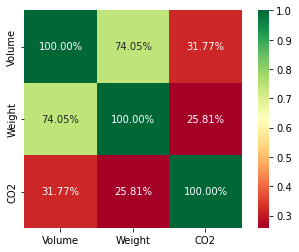

In [18]:
car.corr()
sns.heatmap(car.corr(),annot=True,square=True,cbar=True,cmap='RdYlGn',fmt='.2%')
plt.show()

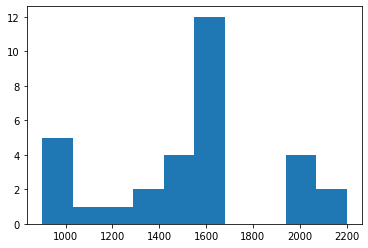

In [19]:
plt.hist(car.Volume,bins=10)
plt.show()

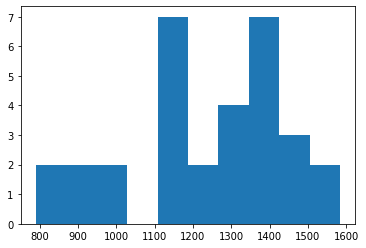

In [20]:
plt.hist(car.Weight,bins=10)
plt.show()

<BarContainer object of 31 artists>

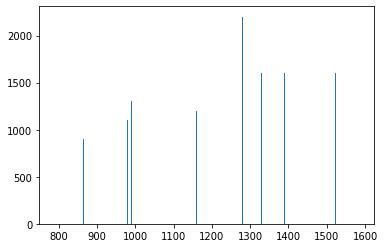

In [21]:
plt.bar(car.Weight,car.Volume)

In [22]:
from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error
r2=r2_score(y,y_pred)
print(r2)
n=len(x)
adjr2=1-((1-r2)*(n-1))/(1-y.shape[0]-1)
adjr2

0.10209009682919967


1.8689450675846455

In [23]:
model.score(x,y)

0.10209009682919967

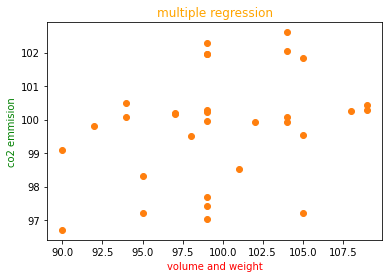

In [48]:
plt.scatter(y,y_pred,marker='o',c='tab:orange')
plt.plot()
plt.title('multiple regression',color='orange')
plt.xlabel('volume and weight',color='red')
plt.ylabel('co2 emmision',color='green')
plt.plot
plt.show()

In [43]:
print(mean_squared_error(y,y_pred))

22.74954247908704


In [44]:
a=model.predict([[1500,1465]])
a

C:\Users\Ankush Niwane\anaconda3\envs\carprediction12\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([99.93836249])

In [29]:
mean_squared_error(y_pred,y)

22.74954247908704

# Xgboost

In [26]:
import xgboost as xgb
regressor = xgb.XGBRegressor(n_estimators = 800, max_depth = 10)
regressor.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
preds=regressor.predict(x)
r2_score(y,preds)

0.9363396842679386

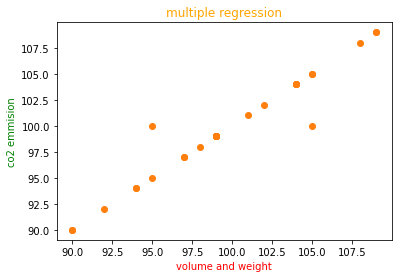

In [31]:
plt.scatter(y,preds,marker='o',c='tab:orange')
plt.plot()
plt.title('multiple regression',color='orange')
plt.xlabel('volume and weight',color='red')
plt.ylabel('co2 emmision',color='green')
plt.plot
plt.show()

C:\Users\Ankush Niwane\anaconda3\envs\carprediction12\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANKUSH~1\AppData\Local\Temp/ipykernel_3904/1432024524.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y,y+1,'-o',linestyle='solid',label='2x+1',c='tab:red')


Text(0, 0.5, 'co2 emmision')

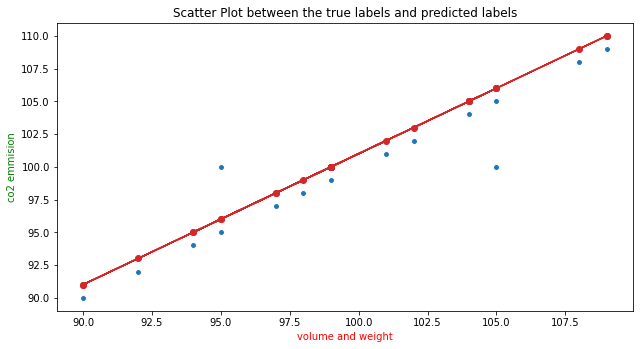

In [35]:
fig10 = plt.figure(figsize = (10, 5))
axes6 = fig10.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(y,preds, linewidth = 1, ax = axes6)
plt.plot(y,y+1,'-o',linestyle='solid',label='2x+1',c='tab:red')
plt.title('Scatter Plot between the true labels and predicted labels')
plt.xlabel('volume and weight',color='red')
plt.ylabel('co2 emmision',color='green')

In [ ]:
#We can predict the CO2 emission of a car based on the size of the engine, but with multiple regression we can throw in more variables, like the weight of the car, to make the prediction more accurate.